In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

# 1. 데이터 확인

In [32]:
X, y = mnist['data'], mnist['target']

In [33]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

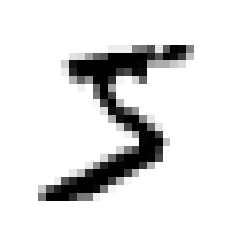

In [34]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[0]

'5'

In [11]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
y = y.astype(np.uint8)

In [13]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

# 2. 데이터 분리

In [35]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [36]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score, cross_val_predict
import mglearn

## 2.1 K-fold

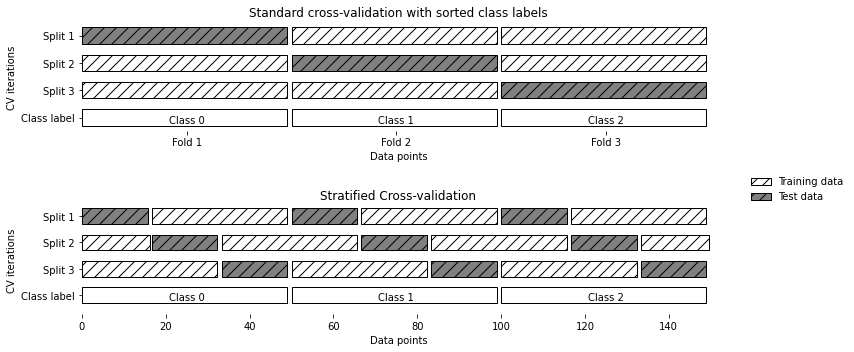

In [50]:
mglearn.plots.plot_stratified_cross_validation()

In [41]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

/Users/kimyongho/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [42]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=skfolds, 
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### '5' 와 '5 아님' 데이터의 비율

5421 54579


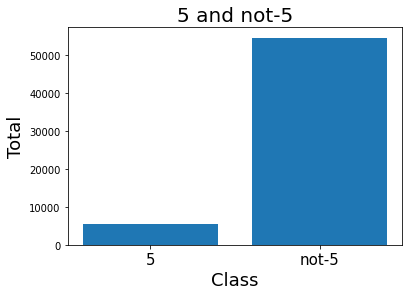

In [70]:
total_five, total_not_five = 0, 0

for x in y_train_5:
    if x == True:
        total_five += 1
    else:
        total_not_five += 1

print(total_five, total_not_five)

values = [total_five, total_not_five]
plt.bar(np.arange(2), values)
plt.title('5 and not-5', fontsize=20)
plt.xlabel('Class', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.xticks(np.arange(2), ['5', 'not-5'], fontsize=15)
plt.show()

In [45]:
cross_val_predict(sgd_clf, X_train, y_train_5, cv=skfolds, n_jobs=-1)

array([ True, False, False, ...,  True, False, False])

In [17]:
from sklearn.base import BaseEstimator

In [18]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, 
                scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [20]:
from sklearn.model_selection import cross_val_predict

In [75]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [83]:
confusion_matrix(y_train_pred, y_train_5)

array([[53892,  1891],
       [  687,  3530]])

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [85]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [86]:
3530 / (3530 + 687)

0.8370879772350012

In [87]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [88]:
3530 / (1891 + 3530)

0.6511713705958311

In [89]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [90]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [91]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [92]:
y_some_digit_pred

array([ True])

In [93]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [94]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [95]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

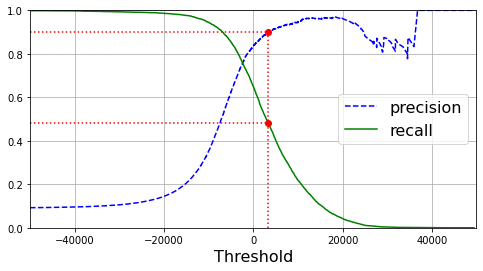

In [103]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="recall")
    plt.legend(loc='center right', fontsize=16)
    plt.xlabel('Threshold', fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

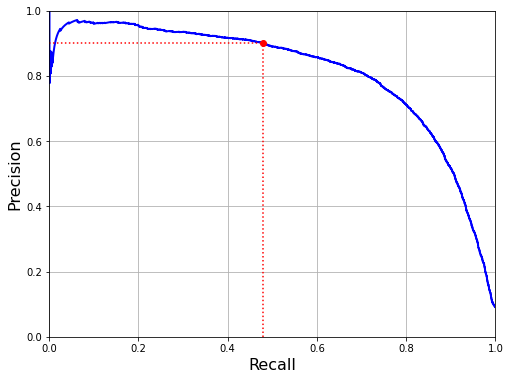

In [121]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.grid(True)
    plt.axis([0,1,0,1])
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [122]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

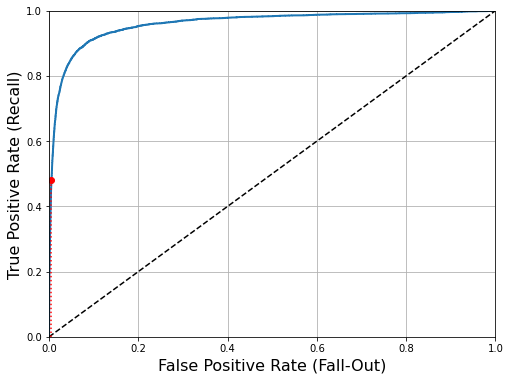

In [124]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [126]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [130]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, 
                                                      y_scores_forest)

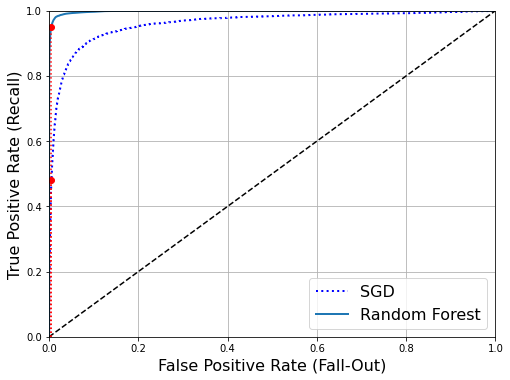

In [132]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [137]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [138]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

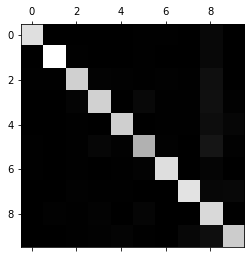

In [139]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [140]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

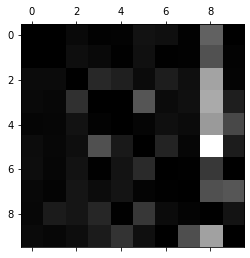

In [153]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [154]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [157]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

In [1]:
from sklearn.svm import SVC

In [2]:
svm_clf = SVC()

In [4]:
svm_clf.decision_function_shape

'ovr'

In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

ovr_clf = OneVsOneClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [34]:
ovr_clf.decision_function([some_digit])

array([[ 2.72420789,  2.72909219,  7.25265966,  8.30764043, -0.31037527,
         9.31302684,  0.70957317,  2.76678409,  6.22757724,  4.84005057]])

In [35]:
ovo_svm_clf = SVC(decision_function_shape='ovo')

In [36]:
ovo_svm_clf.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [37]:
ovo_svm_clf.decision_function([some_digit])

array([[ 0.18330801, -1.43184854, -1.3417459 ,  0.60546918, -1.53353961,
        -0.00707032, -0.25864446, -0.42983274, -0.49844568, -0.16699289,
        -1.6312728 ,  0.70469161, -1.81883645,  0.04197393,  0.01962305,
        -1.00198428, -0.39063556, -0.80693745,  1.2609882 , -1.00006775,
         0.87469679,  0.53399087,  0.20288884,  0.38427052,  2.35478746,
        -0.9982566 ,  1.43957714,  1.89680608,  1.48079386,  2.01880768,
        -2.40264201, -0.74058533, -1.32260623, -2.01426103, -2.43464603,
         2.75400955,  1.26516856,  1.81675876,  2.00674297, -0.59635244,
        -1.09348303, -0.6843212 , -0.61653538, -0.14628775,  0.58569002]])

In [38]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

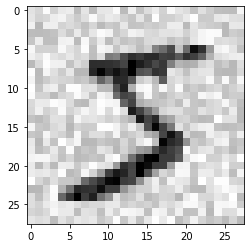

In [45]:
# plt.subplot(121); plot_digit(X_test_mod[0])
plt.imshow(X_train_mod[0].reshape(28,28), cmap='binary')

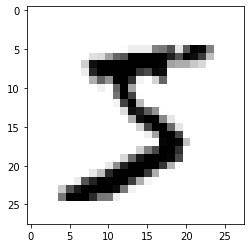

In [46]:
plt.imshow(y_train_mod[0].reshape(28,28), cmap='binary')

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

NameError: name 'some_index' is not defined

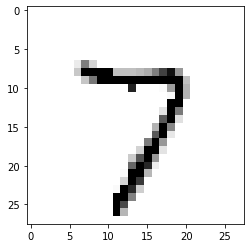

In [50]:
clean_digit = knn_clf.predict([X_test_mod[0]])
plt.imshow(clean_digit.reshape(28,28), cmap='binary')

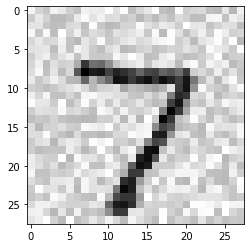

In [51]:
plt.imshow(X_test_mod[0].reshape(28,28), cmap='binary')